**Reto - Sublección Analítica de Redes Sociales**

**Presentado por: Sebastián Torres Franco**


#4) Lectura de datos en Dataframe y visualización
Crear un Dataframes en pandas para el archivo.

In [1]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom

In [2]:
#**********************************Lectura de la información del archivo **********************************************************

#Se lee el archivo en un dataframe auxiliar
red_DF_raw=pd.read_table("/content/email-enron-only.mtx",delim_whitespace=True,header=None)
red_DF_raw.columns=["Nodo_Origen","Nodo_Fin"] #Se renombran las columnas

#Se determina el rango de nodos de la red (para descartar que los nodos no comiencen a númerarse por encima de 1)
first_node=red_DF_raw.values.min() #El primer nodo corresponde al mínimo entre todos los nodos del dataframe
last_node=red_DF_raw.values.max() #Similar, se determina el último nodo del dataframe.

#Ahora se crea el dataframe de adyacencias, inicializado en 0, luego se pone como 1 las posiciones de nodos que están conectados
adj_DF=red_DF_raw.copy() #Se copia el dataframe
adj_DF=pd.DataFrame(np.zeros((last_node,last_node)),index=range(first_node,last_node+1),columns=range(first_node,last_node+1)) #Se inicializa en 0

for node in red_DF_raw.index: #Se cambia a valor de 1 las posiciones de los nodos que están conectados (Se asigna de forma simétrica)
    adj_DF.loc[red_DF_raw.loc[node,"Nodo_Origen"],red_DF_raw.loc[node,"Nodo_Fin"]]=1

adj_DF #Impresión resultados


,1,2,3,4,5,6,7,8,9,10,...,134,135,136,137,138,139,140,141,142,143
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##5) Construcción de red

Construye una red no dirigida a partir de Dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.

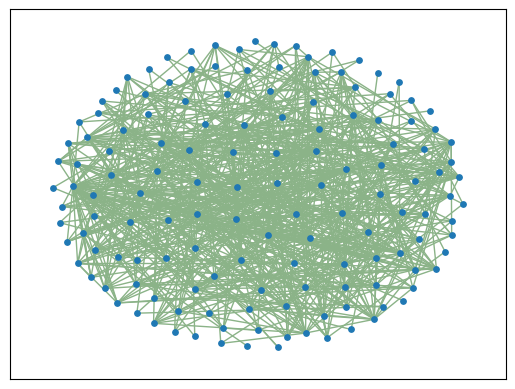

In [3]:
#Se convierte el dataframe de adyacencias a grafo
enron_graph=nx.from_pandas_adjacency(adj_DF)
#Se visualiza el grafo
enron_pos=nx.arf_layout(enron_graph)
nx.draw_networkx(enron_graph,node_size=15,pos=enron_pos,with_labels=False,edge_color="#8bb388")


#6) Responder sobre la red


1.   ¿Cuál es el nodo con el grado máximo?
1.   ¿Cuál es el nodo con el grado mínimo?
1.   ¿Cuál es el diámetro de la red?
2.   ¿Cuál es la distancia promedio más corta?
2.   ¿Es una red bipartita?


In [4]:
#**************************** Definición de funciones ********************************************
def sort_node_list(node_list):
#Descripción:
    #Función usada para ordenar de mayor a menor una lista de nodos de acuerdo con alguna métrica previamente calculada
#Argumentos&Variables:
    #node_list: Lista de nodos a ordenar de mayor a menor
    sorted_list = sorted(node_list.items(), key=lambda x:x[1],reverse=True)
    return sorted_list
#*************************************************************************************************

#***************** 1) Calcular el nodo con el grado máximo

enron_grades=sort_node_list(dict(enron_graph.degree())) #Se calculan los grados delos nodos en la red, y se ordenan con la función sort_node_list
print(f"1) Nodo con mayor grado en la red: {enron_grades[0][0]} con grado: {enron_grades[0][1]}")

#***************** 2) Calcular el nodo con el grado mínimo

print(f"2) Nodos con menor grado en la red (Nodo,Grado): {enron_grades[-6:]}")

#***************** 3) Calcular el diámetro de la red

print(f"3) El diámetro corresponde a una geodésica con distancia de {nx.diameter(enron_graph)} nodos")

#***************** 4) Distancia promedio más corta

print(f"4) La corresponde a una geodésica con distancia de {round(nx.average_shortest_path_length(enron_graph),1)} nodos (Aproximado a 1 decimal)")

#***************** 5) Es red bipartita?
from networkx import bipartite #Se importa atributo para determinar si es bipartita

is_bipartite=nx.is_bipartite(enron_graph)

if is_bipartite: #Se imprime el mensaje de acuerdo al resultado de la variable validadora
   print("5) La red SÍ es bipartita")
else:
   print("5) La red No es bipartita")


1) Nodo con mayor grado en la red: 105 con grado: 42
2) Nodos con menor grado en la red (Nodo,Grado): [(98, 1), (92, 1), (80, 1), (63, 1), (42, 1), (15, 1)]
3) El diámetro corresponde a una geodésica con distancia de 8 nodos
4) La corresponde a una geodésica con distancia de 3.0 nodos (Aproximado a 1 decimal)
5) La red No es bipartita


#7) Cortes mínimos

1.   ¿Cuántos y cuáles nodos hay que remover para que la red sea disconexa?
2.   ¿Cuántos y cuáles arcos hay que remover para que la red sea disconexa?
1.   En base a lo anterior, ¿la red es resistente ante fallas, cambios o errores que pudieran ocurrir?

In [5]:
#Se importan algoritmos de conectividad para computar cortes mínimos sobre la red
import networkx.algorithms.connectivity as nx_con

#***************** 1) ¿Cuántos y cuáles nodos hay que remover para que la red sea disconexa?
min_node_cuts=list(nx_con.minimum_node_cut(enron_graph)) #Se calcula el número mínimo de cortes de nodos necesarios para obtener red disconexa
print(f" 1) Se requiere remover {len(min_node_cuts)} nodo. El nodo es el {min_node_cuts[0]}")

#***************** 2) ¿Cuántos y cuáles arcos hay que remover para que la red sea disconexa?
min_edge_cuts=list(nx_con.minimum_edge_cut(enron_graph)) #Se calcula el número mínimo de cortes de nodos necesarios para obtener red disconexa
print(f" 2) Se requiere remover {len(min_edge_cuts)} arco. El arco es el {min_edge_cuts}")

#***************** 3) En base a lo anterior, ¿la red es resistente ante fallas, cambios o errores que pudieran ocurrir?
print(f" 3) La red no es resistente a fallas. No se puede considerar como resiliente a una red de 143 nodos que se vuelve disconexa con un criterio n-1")
print(f" Esto también muestra que la red es poco densa. Densidad = {nx.density(enron_graph)}")


 1) Se requiere remover 1 nodo. El nodo es el 130
 2) Se requiere remover 1 arco. El arco es el [(130, 98)]
 3) La red no es resistente a fallas. No se puede considerar como resiliente a una red de 143 nodos que se vuelve disconexa con un criterio n-1
 Esto también muestra que la red es poco densa. Densidad = 0.061361174037230376


#8) Visualizar nodo y arco crítico
Una vez encontrados los nodos y arcos del paso anterior, identifícalos con un color diferente en la visualización de la red.

{(130, 98): Text(-0.021334171295166016, -2.2581714391708374, '(130, 98)')}

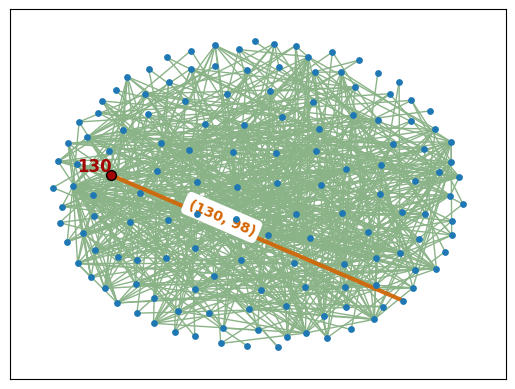

In [6]:
#************************** Definición de funciones *****************************
def node_in_group(G,node_list):
#Descripción:
  #Función encargada de generar un diccionario de los nodos en e grafo G que pertenencen a la lista de nodos node_list
#Argumentos&Variables
  #G: Grafo
  #node_list: Lista de nodos de interés

    G_dictionary={}
    for node in G.nodes(): #Labels de nodos críticos
        if node in node_list:
            G_dictionary[node]=node
    return G_dictionary

def edge_in_group(G,edge_list):
#Descripción:
  #Función encargada de generar un diccionario de los arcos en e grafo G que pertenencen a la lista de arcos edge_list
#Argumentos&Variables
  #G: Grafo
  #edge_list: Lista de arcos de interés

    G_dictionary={}
    for edge in G.edges(): #Labels de nodos críticos
        if edge in edge_list:
            G_dictionary[edge]=edge
    return G_dictionary

#*******************************************************************************
#Se crea una lista de labels vacíos, para asignarles los nodos y arcos críticos, y luego imprimirlos sobre el nodo

enron_nodes_labels=node_in_group(enron_graph,min_node_cuts) #Se crea el diccionario labels para nodos con la función node_in_group
enron_edge_labels=edge_in_group(enron_graph,min_edge_cuts) #Se crea el diccionario labels para arcos con la función edge_in_group

#**************Visualización de la red
#Por simplicidad, dado que únicamente se encontró un arco y un nodo, se superponen las imágenes para la visualización buscada,
#Nodos
nx.draw_networkx_nodes(enron_graph,node_size=15,pos=enron_pos) #Gráfico base de nodos
nx.draw_networkx_nodes(enron_graph,node_size=50,pos=enron_pos,nodelist=min_node_cuts,node_color="#a30505",edgecolors="black") #nodo crítico
nx.draw_networkx_labels(enron_graph,labels=enron_nodes_labels, #Labels para nodo crítico
                        pos=enron_pos,verticalalignment="bottom",horizontalalignment="right",font_weight="bold",font_color="#a30505")

#Arcos
nx.draw_networkx_edges(enron_graph,pos=enron_pos,edge_color="#8bb388") #Gráfico base de arcos
nx.draw_networkx_edges(enron_graph,pos=enron_pos,edge_color="#d46402",edgelist=min_edge_cuts,width=3,alpha=0.9) #Arco crítico
nx.draw_networkx_edge_labels(enron_graph,edge_labels=enron_edge_labels,pos=enron_pos,verticalalignment="bottom", #Label arco crítico
                             horizontalalignment="right",font_weight="bold",font_color="#d46402")

#9) Cálculo de centralidades

Calcula la centralidad de grado, de intermediación y de cercanía.

In [7]:
#*********************************** Definición de funciones *****************************************

#*************1) Centralidad de grado

grade_centrality=sort_node_list(nx.degree_centrality(enron_graph)) #Se calcula la centralidad de grado, y se ordena usando la función sort_node_list
print(f"1) Se muestran los tres nodos de mayor centralidad de grado como evidencia del cálculo {grade_centrality[0:3]}")

#*************2) Centralidad de intermediación

betwn_centrality=sort_node_list(nx.betweenness_centrality(enron_graph)) #Se calcula la centralidad de grado, y se ordena usando la función sort_node_list
print(f"2) Se muestran los tres nodos de mayor centralidad de intermediación como evidencia del cálculo {betwn_centrality[0:3]}")

#*************3) Centralidad de cercanía
clsns_centrality=sort_node_list(nx.closeness_centrality(enron_graph)) #Se calcula la centralidad de grado, y se ordena usando la función sort_node_list
print(f"3) Se muestran los tres nodos de mayor centralidad de cercanía como evidencia del cálculo {clsns_centrality[0:3]}")



1) Se muestran los tres nodos de mayor centralidad de grado como evidencia del cálculo [(105, 0.29577464788732394), (17, 0.2112676056338028), (95, 0.1619718309859155)]
2) Se muestran los tres nodos de mayor centralidad de intermediación como evidencia del cálculo [(105, 0.19400604344556308), (17, 0.11088210445609475), (48, 0.0967314200920742)]
3) Se muestran los tres nodos de mayor centralidad de cercanía como evidencia del cálculo [(105, 0.5), (17, 0.47019867549668876), (95, 0.4382716049382716)]


#10) Visualizando centralidades

Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.

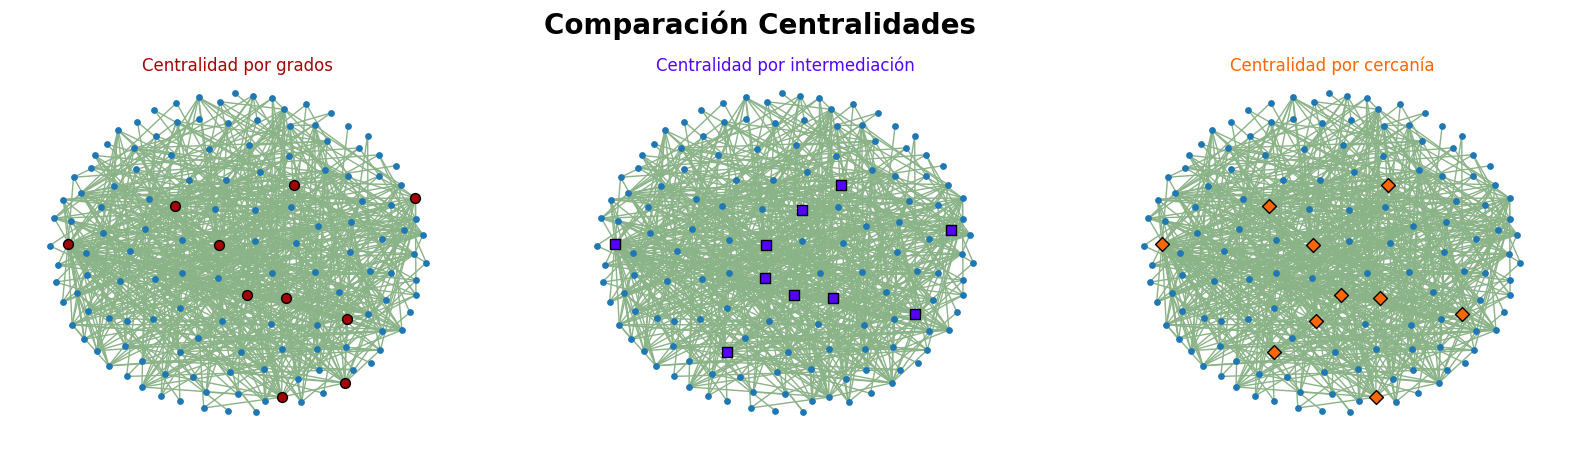

In [8]:
#***************************** Generando diccionarios de nodos con mayor centralidad
#Se generan las listas de nodos con sus respectivas centralidades usando la función node_in_group
top_degree=list(dict(grade_centrality).keys()) #Se obtiene una lista con los nodos de mayor centralidad de grado
nodes_degree=node_in_group(enron_graph,top_degree[0:10]) #Se obtiene la lista de 10 nodos con la fucnión node_in_group

#Se realiza mismo proceso para otras dos centralidades
#Intermediación
top_btwn=list(dict(betwn_centrality).keys()) #Se obtiene una lista con los nodos de mayor centralidad de grado
nodes_btwn=node_in_group(enron_graph,top_btwn[0:10]) #Se obtiene la lista de 10 nodos con la fucnión node_in_group

top_clns=list(dict(clsns_centrality).keys()) #Se obtiene una lista con los nodos de mayor centralidad de grado
nodes_clns=node_in_group(enron_graph,top_clns[0:10]) #Se obtiene la lista de 10 nodos con la fucnión node_in_group

#****************************** Visualización
#Se crea la rejilla de subplots

# nodos con mayor centralidad de grados
fig = plt.figure(figsize=(20,5));
plt.suptitle("Comparación Centralidades",fontweight="bold",fontsize=20);

ax1 = fig.add_subplot(1, 3, 1);
nx.draw_networkx(enron_graph,node_size=15,pos=enron_pos,with_labels=False,edge_color="#8bb388")
nx.draw_networkx_nodes(enron_graph,node_size=50,pos=enron_pos,nodelist=nodes_degree,node_color="#a30505",edgecolors="black")
ax1.set_title("Centralidad por grados",y=0.95,fontdict={"color":"#a30505"});
ax1.axis('off');

# nodos con mayor centralidad de intermediación
ax2 = fig.add_subplot(1, 3, 2);
nx.draw_networkx(enron_graph,node_size=15,pos=enron_pos,with_labels=False,edge_color="#8bb388")
nx.draw_networkx_nodes(enron_graph,node_size=50,pos=enron_pos,nodelist=nodes_btwn,node_color="#5603fc",edgecolors="black",node_shape="s")
ax2.set_title("Centralidad por intermediación",y=0.95,fontdict={"color":"#5603fc"});
ax2.axis('off');

# nodos con mayor centralidad de cercanía
ax3 = fig.add_subplot(1, 3, 3);
nx.draw_networkx(enron_graph,node_size=15,pos=enron_pos,with_labels=False,edge_color="#8bb388")
nx.draw_networkx_nodes(enron_graph,node_size=50,pos=enron_pos,nodelist=nodes_clns,node_color="#fc6603",edgecolors="black",node_shape="D")
ax3.set_title("Centralidad por cercanía",y=0.95,fontdict={"color":"#fc6603"});
ax3.axis('off');


# nodos con mayor centralidad de intermediación
#nx.draw_networkx_nodes(enron_graph,node_size=50,pos=enron_pos,nodelist=nodes_clns,node_color="#a30505",edgecolors="black",node_shape="s")


#11) Page Rank
Crea una red dirigida, ahora sí importa quién manda el correo y quien lo recibe. En esta nueva red calcula el PageRank de los nodos, y visualízalos en la red.

Se muestran 3 Nodos con mayor centralidad PageRank como evidencia de cálculo: [(17, 0.048680151748073115), (6, 0.03331285690314519), (7, 0.03256841781764689)] 



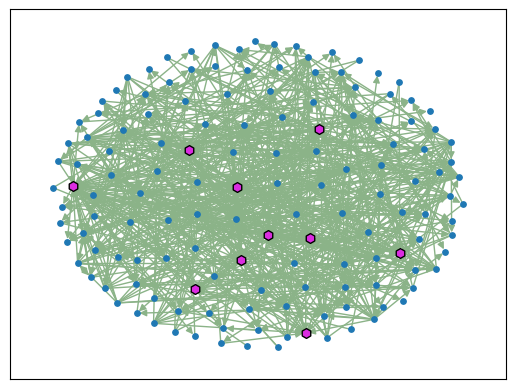

In [9]:
#********************** Cálculo de la centralidad

#Se crea el grafo dirigido usando la opción nx.DiGraph
enron_Di_graph=nx.from_pandas_adjacency(adj_DF,create_using=nx.DiGraph)

#Se calcula la centralidad por PageRank
pr_centrality=sort_node_list(nx.pagerank(enron_Di_graph)) #Cálculo de la centralidad en diccionario
top_pr=list(dict(pr_centrality).keys()) #Se forma una lista con las llaves del diccionario
nodes_pr=node_in_group(enron_Di_graph,top_pr[0:10]) #Se crea la lista de nodos para visualización en red
sort_node_list#Se crea lista ordenada con nodo y centralidad PageRank
print(f"Se muestran 3 Nodos con mayor centralidad PageRank como evidencia de cálculo: {pr_centrality[0:3]} \n")
top_pr
sort_node_list

#********************** Visualización
nx.draw_networkx(enron_Di_graph,node_size=15,pos=enron_pos,with_labels=False,edge_color="#8bb388");
nx.draw_networkx_nodes(enron_Di_graph,node_size=50,pos=enron_pos,nodelist=nodes_clns,node_color="#da2de0",edgecolors="black",node_shape="h");



#12) Anota tus conclusiones:

Total de empleados, total de interacciones por correo electrónico.

*   Quién tiene el máximo grado, quien el mínimo, y que significa.

**R/:** El máximo grado de la red lo tuvo el trabajador 105, con 42 grados. Esto quiere decir que el trabajador tenía comunicaciones con cotros 42 trabajadores. En contratse, los trabajadores con menor grado fueron el 98, 92,80, 63, 42, 15, todos con únicamente un grado, es decir, que se comunicaban vía correo únicamente con otro trabajador

*   ¿Cuál es el diámetro de la red y qué significa?

**R/:** El diámetro obtenido para la red fue un camino de 8 nodos. Esto quiere decir que máximo se requeriría que 8 personas se comuniquen por correo para que la comunicación de un trabajador "A" llegue a un trabajador "B", es decir, se requiere de máximo 7 intermediarios.

*   ¿Cuál es el promedio de los caminos más corto y que significa?

**R/** EL promedio de los caminos más cortos es de de 3.0 nodos. Esto quiere decir que en promedio, se requieren que 3 personas se comuniquen por correo para que la comunicación de un trabajador "A" llegue a un trabajador "B", es decir, se requieren en promedio de 2 intermediarios.

*   ¿La red es robusta? ¿Cómo reacciona el sistema antes fallas o ataques?

**R/:** La red no es robusta. Basta con remover un nodo o un arco para volverla disconexa. Esto quiere decir que basta con que el trabajador 130 deje de comunicarse y recibir comunicaciones por correo para que la red pierda comunicación en la red se rompa. Esto ocurre también si el trabajador 130 deja de comunicarse con el trabajador 98.

*   Tomando en cuenta las tres medidas de centralidad, ¿cuáles son los nodos más importantes?

**R/:** De acuerdo con las medidas, los trabajadores más importantes son el 105, el 95, y el 17, que tienden a repetirse dentro de los nodos con mayor centralidad.